In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

[]

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

AttributeError: measurement

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.


In [53]:
session.query(func.max(Measurement.date)).fetchall()

NameError: name 'Measurement' is not defined

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [55]:
last_text = session.query(func.max(Measurement.date)).all()[0][0]
last_list = last_text.split("-")
start_date = dt.date(int(last_list[0]), int(last_list[1]), int(last_list[2])) - dt.timedelta(days=365)
query_last_year = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > start_date).all()



NameError: name 'Measurement' is not defined

In [56]:
year_prcp = pd.DataFrame(query_last_year, columns = ['Date', 'prcp'])
year_prcp = year_prcp.set_index('Date')
year_prcp = year_prcp.dropna()



NameError: name 'query_last_year' is not defined

In [57]:
year_prcp = year_prcp.sort_index()

plot_prcp = year_prcp.groupby('Date').sum()

ax = plot_prcp.plot.bar(ylabel='Inches', rot='vertical')
plt.xticks(np.arange(0, 365, 91), ['2016-08-24', '2016-11-24', '2017-02-24', '2017-05-24', '2017-08-22'])


NameError: name 'year_prcp' is not defined

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stat = []
rows = ['Count','Mean','StD','Min','Max','25%','50%','75%']
summary_stat.append(year_prcp['prcp'].sum())
summary_stat.append(year_prcp['prcp'].mean())
summary_stat.append(year_prcp['prcp'].std())
summary_stat.append(year_prcp['prcp'].min())
summary_stat.append(year_prcp['prcp'].max())
summary_stat.append(year_prcp['prcp'].quantile(0.25))
summary_stat.append(year_prcp['prcp'].quantile(0.5))
summary_stat.append(year_prcp['prcp'].quantile(0.75))

prcp_stat = pd.DataFrame({
    "Precipitation":values
}, index=rows)
prcp_stat

NameError: name 'year_prcp' is not defined

# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
total_stats = engine.execute('select count(station) from station;').fetchall()
total_stats_1 = total_stats[0][0]
total_stats_1

OperationalError: (sqlite3.OperationalError) no such table: station
[SQL: select count(station) from station;]
(Background on this error at: http://sqlalche.me/e/14/e3q8)

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_activity = session.query(measurement.station, func.count(Measurement.station).label('readings')).group_by(measurement.station).all()

stations_activity.sort(reverse=True, key=lambda x:x[1])

pprint(station_activity)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_activity[0][0]

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature')

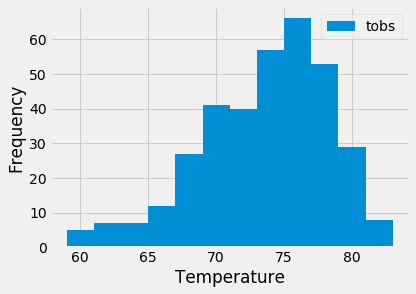

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(Measurement.tobs).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > start_date,\
    Measurement.station == most_active).all()

active_station_temp_list = []

for item in active_station:
    active_station_temp_list.append(float(str(item[0])))

plt.hist(active_station_temp_list, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])
plt.show()

# Close Session

In [16]:
session.close()